In [1]:
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

C:\Users\haydencordeiro\AppData\Local\Temp\ipykernel_10720\748826985.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# df1 = pd.read_excel("./data/output_data_filtered.xlsx")
# df1 = df1.drop('column_name', axis=1)
# df1 = df1.groupby('Year')['Value'].sum().reset_index()



In [31]:
# df2 = pd.read_csv("./data/global-hunger-index.csv")
# df2 = df2.groupby('Year')['Global Hunger Index (2021)'].sum().reset_index()



,Year,Global Hunger Index (2021)
0,2000,2737.2
1,2006,2420.0
2,2012,2031.0
3,2021,2149.2


In [25]:
# df2

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN
...,...,...,...,...,...
466,Yemen,YEM,2006,38.8,NaN
467,Yemen,YEM,2012,38.4,NaN
468,Yemen,YEM,2021,45.1,NaN
469,Zambia,ZMB,2021,27.5,Value represents the mid-point of its group in...


In [39]:
# df3 = pd.merge(df1, df2[['Year', 'Global Hunger Index (2021)']], on='Year', how='left')



In [41]:
# df3 = df3.dropna()

In [5]:
df3 = pd.read_excel("./data/population_ghi_unemploment_yearwise_africa_sheet.xlsx")
df3.head()


,Year,Population,GHI,Unemployment Above age 15,Unemployment between age 15-24,Unemployment Above age 25+,Share of agricultural land in South Africa 2000-2020 in percentage,People employed in agricultural sector in millions,Total employment in Africa 2010-2021(In Millions)
0,2010,1020662522,29.244444,9.211471,17.962029,7.029765,79.87,193.85,365.5
1,2011,1047206275,28.563889,9.213353,17.908324,7.091971,79.45,196.67,373.2
2,2012,1074414693,27.201316,9.083794,17.958588,6.988044,79.42,197.48,380.7
3,2013,1102849969,27.202778,8.976838,17.849559,6.951500,79.42,200.95,389.5
4,2014,1131930821,26.522222,8.963500,17.916691,7.000088,79.42,201.96,398.9


<!-- Deep Learning -->

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
predict_col = "GHI"
inp_cols = [ i for i in df3.columns if i!=predict_col]
N = len(inp_cols)

inp_cols


['Year',
 'Population',
 'Unemployment Above age 15',
 'Unemployment between age 15-24',
 'Unemployment Above age 25+',
 'Share of agricultural land in South Africa 2000-2020 in percentage',
 'People employed in agricultural sector in millions',
 'Total employment in Africa 2010-2021(In Millions)']

In [15]:
X = df3[inp_cols].values
y = df3[predict_col].values


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(N,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [30]:
# Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [31]:
# Training the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=1, verbose=1)


Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 688.7345 - mae: 26.2149
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 676.5299 - mae: 25.9856
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 663.9922 - mae: 25.7478
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 652.8811 - mae: 25.5330
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 642.3008 - mae: 25.3251
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 628.3649 - mae: 25.0504
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 613.6357 - mae: 24.7574
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 595.7267 - mae: 24.3922
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 575.6689 - mae: 23.9766
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 553.7188 - mae: 23.5116
Epoch 11/100
10/10 [=========

In [32]:
# Evaluating the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print('Test Mean Absolute Error:', test_mae)

1/1 [==============================] - 0s 124ms/step - loss: 5366.8540 - mae: 43.0722
Test Mean Absolute Error: 43.07223892211914


In [33]:
predictions = model.predict(X_test_scaled)


1/1 [==============================] - 0s 73ms/step


In [34]:
model.predict(scaler.transform([[2020,5]]))

ValueError: X has 2 features, but StandardScaler is expecting 8 features as input.

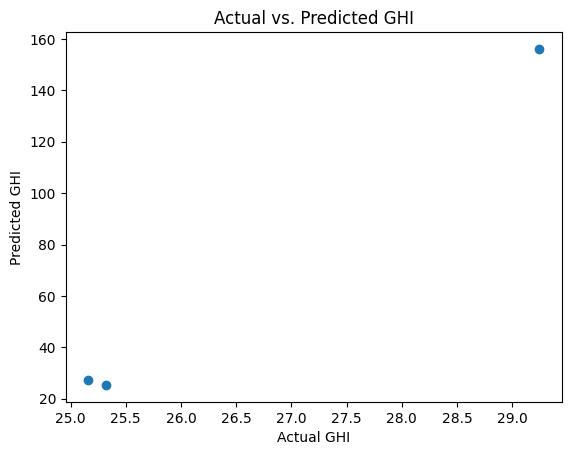

In [35]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual GHI')
plt.ylabel('Predicted GHI')
plt.title('Actual vs. Predicted GHI')
plt.show()

In [36]:
print(y_test)

[25.32142857 25.16111111 29.24444444]


In [37]:
predictions

array([[ 25.39189 ],
       [ 27.439857],
       [156.11195 ]], dtype=float32)

In [38]:
# ML

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [41]:
y_pred

array([25.22289385, 25.16113684, 28.525478  ])

In [42]:
# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination (R^2):', r2_score(y_test, y_pred))


Mean Squared Error: 0.1755406142253859
Coefficient of Determination (R^2): 0.9507666960035276


In [43]:
df3.corr()

,Year,Population,GHI,Unemployment Above age 15,Unemployment between age 15-24,Unemployment Above age 25+,Share of agricultural land in South Africa 2000-2020 in percentage,People employed in agricultural sector in millions,Total employment in Africa 2010-2021(In Millions)
Year,1.000000,0.999658,-0.868668,0.620220,0.672298,0.840870,-0.490264,0.990075,0.994583
Population,0.999658,1.000000,-0.856049,0.632465,0.678267,0.849356,-0.474245,0.992619,0.993453
GHI,-0.868668,-0.856049,1.000000,-0.319065,-0.481104,-0.573240,0.674823,-0.805645,-0.879428
Unemployment Above age 15,0.620220,0.632465,-0.319065,1.000000,0.950644,0.943985,-0.063673,0.697094,0.599728
Unemployment between age 15-24,0.672298,0.678267,-0.481104,0.950644,1.000000,0.922352,-0.188779,0.719394,0.654080
Unemployment Above age 25+,0.840870,0.849356,-0.573240,0.943985,0.922352,1.000000,-0.240621,0.892245,0.828152
Share of agricultural land in South Africa 2000-2020 in percentage,-0.490264,-0.474245,0.674823,-0.063673,-0.188779,-0.240621,1.000000,-0.424832,-0.479701
People employed in agricultural sector in millions,0.990075,0.992619,-0.805645,0.697094,0.719394,0.892245,-0.424832,1.000000,0.985669
Total employment in Africa 2010-2021(In Millions),0.994583,0.993453,-0.879428,0.599728,0.654080,0.828152,-0.479701,0.985669,1.000000


In [44]:
X_test

array([[2.02100000e+03, 1.34712554e+09, 1.01477941e+01, 1.94925000e+01,
        8.40175000e+00, 7.94200000e+01, 2.29330000e+02, 4.66100000e+02],
       [2.01900000e+03, 1.28359548e+09, 9.14791176e+00, 1.81488824e+01,
        7.41941176e+00, 7.94200000e+01, 2.20000000e+02, 4.53600000e+02],
       [2.01000000e+03, 1.02066252e+09, 9.21147059e+00, 1.79620294e+01,
        7.02976471e+00, 7.98700000e+01, 1.93850000e+02, 3.65500000e+02]])

In [45]:
model.predict([[2.02100000e+03, 1.34712554e+09, 1.01477941e+01, 1.94925000e+01,
        8.40175000e+00, 7.94200000e+01, 2.29330000e+02, 4.66100000e+02]])

array([25.22289385])

In [49]:
X = df3[inp_cols].values
y = df3[predict_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
df3[inp_cols]

,Year,Population,Unemployment Above age 15,Unemployment between age 15-24,Unemployment Above age 25+,Share of agricultural land in South Africa 2000-2020 in percentage,People employed in agricultural sector in millions,Total employment in Africa 2010-2021(In Millions)
0,2010,1020662522,9.211471,17.962029,7.029765,79.87,193.85,365.5
1,2011,1047206275,9.213353,17.908324,7.091971,79.45,196.67,373.2
2,2012,1074414693,9.083794,17.958588,6.988044,79.42,197.48,380.7
3,2013,1102849969,8.976838,17.849559,6.951500,79.42,200.95,389.5
4,2014,1131930821,8.963500,17.916691,7.000088,79.42,201.96,398.9
5,2015,1161665468,9.112515,18.149868,7.166691,79.42,204.26,409.7
6,2016,1191571529,9.161441,18.208338,7.250309,79.42,209.30,419.5
7,2017,1221635358,9.214662,18.329265,7.347397,79.42,212.92,429.7
8,2018,1252369090,9.061706,17.975662,7.309926,79.42,215.61,441.4
9,2019,1283595475,9.147912,18.148882,7.419412,79.42,220.00,453.6


In [53]:
df3[inp_cols].values[0]

array([2.01000000e+03, 1.02066252e+09, 9.21147059e+00, 1.79620294e+01,
       7.02976471e+00, 7.98700000e+01, 1.93850000e+02, 3.65500000e+02])

In [55]:
model.predict([df3[inp_cols].values[0]])

array([28.525478])

In [56]:
model.predict([[2.01000000e+03, 1.02066252e+09, 9.21147059e+00, 1.79620294e+01,
       7.02976471e+00, 7.98700000e+01, 1.93850000e+02, 3.65500000e+02]])

ValueError: Expected 2D array, got 1D array instead:
array=[2.0100000e+03 1.0206625e+09 9.2114706e+00 1.7962029e+01 7.0297647e+00
 7.9870003e+01 1.9385001e+02 3.6550000e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.